step1. Import all the libraries

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


Read the data set

In [2]:
import pandas as pd

file_path = 'GUIDE_Train.csv'
train_data = pd.read_csv(file_path, nrows=120000)
train_data.head() 
 

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [3]:
train_data = train_data.drop(columns=['Id'])

Check the null values

In [4]:
nullvalues = train_data.isna().sum()
nullvalues.sort_values(ascending=False)

ResourceType          119896
ActionGrouped         119295
ActionGranular        119295
ThreatFamily          119043
EmailClusterId        118766
AntispamDirection     117829
Roles                 117215
SuspicionLevel        101838
LastVerdict            91811
MitreTechniques        68989
IncidentGrade            633
Timestamp                  0
EntityType                 0
DetectorId                 0
AlertTitle                 0
Category                   0
OrgId                      0
IncidentId                 0
AlertId                    0
EvidenceRole               0
AccountObjectId            0
AccountName                0
Sha256                     0
DeviceId                   0
Url                        0
AccountSid                 0
AccountUpn                 0
IpAddress                  0
ApplicationId              0
RegistryValueData          0
RegistryValueName          0
RegistryKey                0
NetworkMessageId           0
DeviceName                 0
FileName      

drop the null value columns

In [5]:
import pandas as pd

# List of columns to drop based on their null values
columns_to_drop = [
    'ResourceType', 
    'ActionGrouped', 
    'ActionGranular', 
    'ThreatFamily', 
    'EmailClusterId', 
    'AntispamDirection', 
    'Roles', 
    'SuspicionLevel', 
    'LastVerdict', 
    'MitreTechniques'
]

# Drop the specified columns
train_data = train_data.drop(columns=columns_to_drop)

# Check the remaining columns
print("Remaining columns after dropping:")
print(train_data.columns)


Remaining columns after dropping:
Index(['OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City'],
      dtype='object')


delete the null rows

In [6]:
train_data = train_data.dropna()

drop the timestamp column

In [7]:
import pandas as pd

# Create a DataFrame
train_data['Timestamp'] = pd.DataFrame(train_data['Timestamp'])

# Convert the 'Timestamp' column to datetime format
train_data['Timestamp'] = pd.to_datetime(train_data['Timestamp'])

# Separate year, month, and day into new columns
train_data['Year'] = train_data['Timestamp'].dt.year
train_data['Month'] = train_data['Timestamp'].dt.month
train_data['Day'] = train_data['Timestamp'].dt.day

# Display the DataFrame
train_data = train_data.drop(columns=['Timestamp'])

resample method used by undersampling method

In [8]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Assuming your dataframe is called 'df' and the column is 'incidentgrade'

# Get the value counts
value_counts = train_data['IncidentGrade'].value_counts()

# Find the minimum count
min_count = value_counts.min()

# Create a list to store the balanced dataframes
balanced_dfs = []

# Undersample each class
for class_value in value_counts.index:
    class_df = train_data[train_data['IncidentGrade'] == class_value]
    if len(class_df) > min_count:
        # Undersample
        undersampled_df = resample(class_df,
                                   replace=False,    # sample without replacement
                                   n_samples=min_count,
                                   random_state=42)  # reproducible results
        balanced_dfs.append(undersampled_df)
    else:
        # If this class is already at or below the minimum, keep all samples
        balanced_dfs.append(class_df)

# Combine the balanced dataframes
df_balanced = pd.concat(balanced_dfs)

# Verify the new class distribution
print(df_balanced['IncidentGrade'].value_counts())
train_data = df_balanced

IncidentGrade
BenignPositive    25946
TruePositive      25946
FalsePositive     25946
Name: count, dtype: int64


In [9]:
train_data.shape

(77838, 36)

In [10]:
train_data = train_data.astype('category')

Encoded the categorical variable

this  data is numerical columns i have converted into the categorical column

In [11]:
train_data['CountryCode'].value_counts

<bound method IndexOpsMixin.value_counts of 101114    242
113702    242
23478     242
76757     242
99340     242
         ... 
119982    242
119984    242
119986    242
119988    242
119999    242
Name: CountryCode, Length: 77838, dtype: category
Categories (103, int64): [0, 1, 2, 3, ..., 163, 167, 198, 242]>

In [12]:
train_data.columns

Index(['OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole', 'DeviceId',
       'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year', 'Month', 'Day'],
      dtype='object')

In [13]:
def reduce_rare_categories(df, column, threshold):
    # Get the top N most frequent categories
    top_categories = df[column].value_counts().nlargest(threshold).index
    
    # If the column is categorical, add the 'others' category only if it's not already present
    if df[column].dtype.name == 'category':
        if 'others' not in df[column].cat.categories:
            df[column] = df[column].cat.add_categories('others')
    
    # Replace categories not in the top N with 'others'
    return df[column].where(df[column].isin(top_categories), 'others')

filter_columns = ['CountryCode', 'State', 'City', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
                  'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',  # Fixed comma
                  'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId','FolderPath','ResourceIdName','Day',
                  'RegistryKey', 'RegistryValueName', 'RegistryValueData', 'ApplicationId', 'ApplicationName', 'FileName']

for col in filter_columns:
    train_data[col] = reduce_rare_categories(train_data, col, threshold=20)

# Now df contains 'others' for rare categories
train_data.head()


,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,...,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day
101114,others,others,others,3,4,SuspiciousActivity,BenignPositive,Ip,Related,98799,...,117668,3586,5,66,242,1445,10630,2024,6,10
113702,30,others,others,others,others,Exfiltration,BenignPositive,File,Impacted,98799,...,others,3586,5,66,242,1445,10630,2024,6,6
23478,others,others,others,6,5,InitialAccess,BenignPositive,Mailbox,Impacted,98799,...,117668,3586,5,66,242,1445,10630,2024,6,10
76757,2,others,others,others,13,Exfiltration,BenignPositive,MailMessage,Impacted,98799,...,117668,3586,5,66,242,1445,10630,2024,6,7
99340,others,others,others,11,9,InitialAccess,BenignPositive,User,Impacted,98799,...,117668,3586,5,66,242,1445,10630,2024,6,3


In [14]:
categorical_columns = train_data.columns

In [15]:
from sklearn.preprocessing import LabelEncoder

# Convert all categorical columns to strings to ensure uniform type
for col in categorical_columns:
    train_data[col] = train_data[col].astype(str)

# Now apply LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    train_data[col] = label_encoder.fit_transform(train_data[col])

train_data.head()  # Check if categorical columns have been encoded


,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,...,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day
101114,20,20,20,13,14,16,0,9,1,19,...,3,14,3,9,12,6,3,1,5,0
113702,12,20,20,20,20,7,0,7,0,19,...,20,14,3,9,12,6,3,1,5,16
23478,20,20,20,16,15,10,0,13,0,19,...,3,14,3,9,12,6,3,1,5,0
76757,9,20,20,20,5,7,0,12,0,19,...,3,14,3,9,12,6,3,1,5,17
99340,20,20,20,3,19,10,0,22,0,19,...,3,14,3,9,12,6,3,1,5,12


In [16]:
train_data.nunique()

OrgId                 21
IncidentId            21
AlertId               21
DetectorId            21
AlertTitle            21
Category              18
IncidentGrade          3
EntityType            23
EvidenceRole           2
DeviceId              21
Sha256                21
IpAddress             21
Url                   21
AccountSid            21
AccountUpn            21
AccountObjectId       21
AccountName           21
DeviceName            21
NetworkMessageId      21
RegistryKey           21
RegistryValueName     21
RegistryValueData     21
ApplicationId         21
ApplicationName       21
OAuthApplicationId    17
FileName              21
FolderPath            21
ResourceIdName        21
OSFamily               4
OSVersion             11
CountryCode           21
State                 21
City                  21
Year                   2
Month                  6
Day                   21
dtype: int64

Test train split up

In [17]:
# Update with the actual column name for your target variable
target_column = 'IncidentGrade'  # Example: Replace 'class' with the actual name of the target column

# Split features and target variable
X = train_data.drop(target_column, axis=1)
y = train_data[target_column]

# Train-Validation split (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")


Training set shape: (62270, 35)
Validation set shape: (15568, 35)


In [18]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = rf_model.predict(X_val)

# Evaluate model performance
print(classification_report(y_val, y_pred))

# Check macro F1, precision, and recall
macro_f1 = f1_score(y_val, y_pred, average='macro')
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


              precision    recall  f1-score   support

           0       0.68      0.78      0.73      5189
           1       0.76      0.70      0.73      5189
           2       0.80      0.74      0.77      5190

    accuracy                           0.74     15568
   macro avg       0.74      0.74      0.74     15568
weighted avg       0.74      0.74      0.74     15568

Macro F1 Score: 0.7406249273639224
Precision: 0.7446549636140799
Recall: 0.7401721417261182


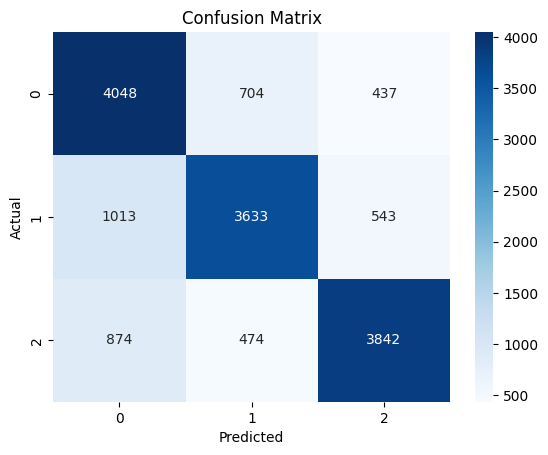

In [19]:
# Confusion matrix to visualize misclassifications
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Grid search for Hyperparameter tuning

In [20]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_rf.predict(X_val)

# Evaluate the tuned model
print(classification_report(y_val, y_pred_best))


              precision    recall  f1-score   support

           0       0.62      0.88      0.73      5189
           1       0.83      0.62      0.71      5189
           2       0.84      0.70      0.76      5190

    accuracy                           0.73     15568
   macro avg       0.76      0.73      0.73     15568
weighted avg       0.76      0.73      0.73     15568



In [21]:
import joblib

# Save the model to a file
joblib.dump(best_rf, 'final_model.pkl')

# Load the model later when needed
# model = joblib.load('final_model.pkl')


['final_model.pkl']